In [66]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display, Markdown, Latex
from scipy.optimize import curve_fit

csv_data_file_path = 'docs/datasets/stations-data.csv'

In [67]:
def read_data(file_path):
    try:
        stations_data = pd.read_csv(file_path, delimiter=';')
    except FileNotFoundError:
        print(f"Error: Dataset file not found at {file_path}")
        return None
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None

    # Clean column names
    stations_data.columns = [col.strip() for col in stations_data.columns]
    
    # Convert decimal comma to decimal point for numeric columns
    numeric_columns = ['Iron', 'Coal', 'Steel', 'Vegetables', 'Cereals', 'Wool', 'Coffee', 'Cattle', 'Mail', 'Revenues', 'Expenses']
    
    try:
        for col in numeric_columns:
            if col in stations_data.columns:
                # Replace comma with period and convert to float
                stations_data[col] = stations_data[col].astype(str).str.replace(',', '.').astype(float)
    except Exception as e:
        print(f"Error converting columns to numeric: {e}")
        return None
    
    return stations_data



**US15** - As a Player, I want to perform a statistical analysis of the average annual profit of a user-specified railway station. In order to achieve this, a table with key descriptive measures: mean, standard deviation, median, and mode will be generated. 

In [68]:
import pandas as pd
from scipy import stats


def analyze_station_profits(station_name=None):

    stations_data = read_data(csv_data_file_path)
    # Calcular profit mensal
    stations_data['Profit'] = stations_data['Revenues'] - stations_data['Expenses']

    # Estações disponíveis no csv
    available_stations = sorted(stations_data['Station'].unique())


    if station_name is None:
        print("\nAvailable stations:")
        for i, station in enumerate(available_stations):
            print(f"{i+1}. {station}")

        while True:
            try:
                station_choice = input("\nEnter station name or number: ")
                # input é num ou nome
                if station_choice.isdigit():
                    station_idx = int(station_choice) - 1
                    if 0 <= station_idx < len(available_stations):
                        station_name = available_stations[station_idx]
                        break
                    else:
                        print(f"Please enter a number between 1 and {len(available_stations)}")
                elif station_choice in available_stations:
                    station_name = station_choice
                    break
                else:
                    print("Station not found. Please enter a valid station name or number.")
            except Exception as e:
                print(f"Invalid input: {e}")

    # estação pedida no terminal
    station_data = stations_data[stations_data['Station'] == station_name]

    if len(station_data) == 0:
        print(f"No data found for station: {station_name}")
        return None

    # agrupar por ano e somar o profit anual
    annual_profit = station_data.groupby('Year')['Profit'].sum()

    print("\n--- Annual Profits by Year ---")
    print(annual_profit)

    # estatísticas
    mean_profit = annual_profit.mean()
    std_profit = annual_profit.std()
    median_profit = annual_profit.median()
    mode_result = stats.mode(annual_profit, keepdims=False)
    mode_profit = mode_result.mode

    summary_table = pd.DataFrame({
        'Statistic': ['Mean', 'Standard Deviation', 'Median', 'Mode'],
        f'Annual Profit ({station_name})': [
            round(mean_profit, 2),
            round(std_profit, 2),
            round(median_profit, 2),
            round(mode_profit, 2)
        ]
    })

    print(f"\n--- Annual Profit Analysis for {station_name} Station ---\n")
    print(summary_table)

    #anos com maior e menor profit
    most_profitable_year = annual_profit.idxmax()
    most_profitable_amount = annual_profit.max()
    least_profitable_year = annual_profit.idxmin()
    least_profitable_amount = annual_profit.min()

    print("\n--- Most and Least Profitable Years ---")
    print(f"Most profitable year: {most_profitable_year} with profit of {round(most_profitable_amount, 2)}")
    print(f"Least profitable year: {least_profitable_year} with profit of {round(least_profitable_amount, 2)}")

    #outliers a utilizar quartis
    Q1 = annual_profit.quantile(0.25)
    Q3 = annual_profit.quantile(0.75)
    IQR = Q3 - Q1

    #definir limites 
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    #encontrar outliers
    outliers = annual_profit[(annual_profit < lower_bound) | (annual_profit > upper_bound)]

    if len(outliers) > 0:
        print("\n--- Outlier Years ---")
        print("The following years have abnormal profit values:")
        for year, profit in outliers.items():
            outlier_type = "high" if profit > upper_bound else "low"
            print(f"Year {year}: {round(profit, 2)} (Abnormally {outlier_type} profit)")
    else:
        print("\nNo outlier years detected using the IQR method.")

analyze_station_profits()



Available stations:
1. Berlin
2. Frankfurt
3. Hamburg
4. Hannover
5. Stuttgart



--- Annual Profits by Year ---
Year
2015      655.76
2016     9174.78
2017     1790.51
2018     4205.17
2019     1541.99
2020     5954.08
2021    13345.73
2022    13660.99
2023    39684.90
2024    25653.68
Name: Profit, dtype: float64

--- Annual Profit Analysis for Berlin Station ---

            Statistic  Annual Profit (Berlin)
0                Mean                11566.76
1  Standard Deviation                12486.26
2              Median                 7564.43
3                Mode                  655.76

--- Most and Least Profitable Years ---
Most profitable year: 2023 with profit of 39684.9
Least profitable year: 2015 with profit of 655.76

--- Outlier Years ---
The following years have abnormal profit values:
Year 2023: 39684.9 (Abnormally high profit)


**US16** - As a Player, I want to perform a comparative analysis of passenger arrivals across all stations. To achieve this, a boxplot will be created for each station, displaying the number of arriving passengers using all recorded data.

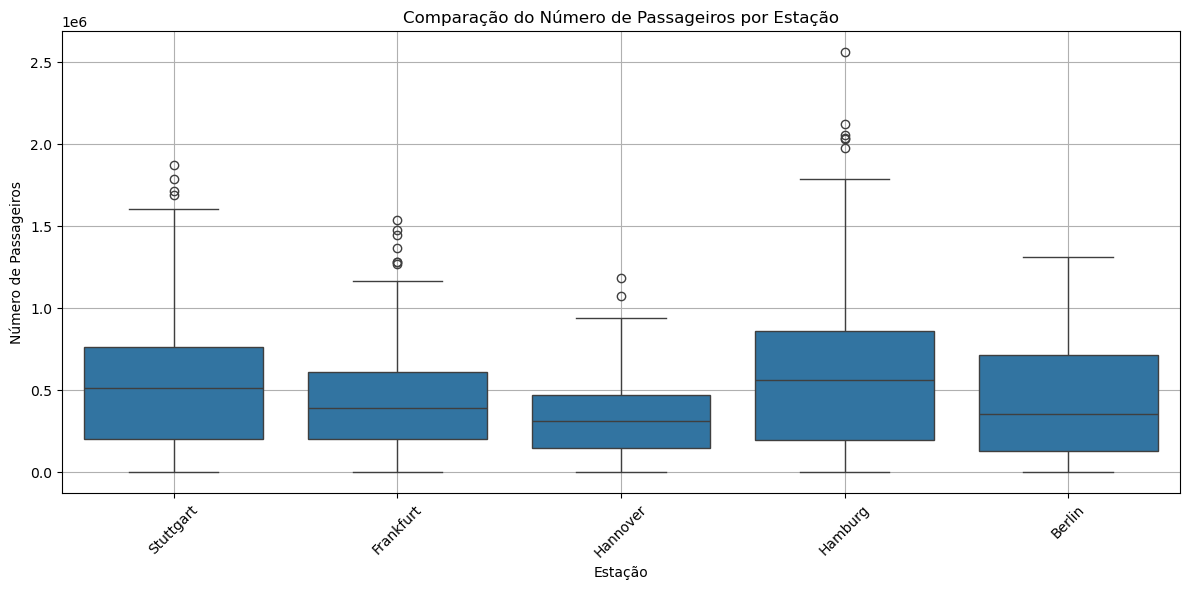

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lê os dados
df = read_data(csv_data_file_path)

# Só continua se os dados foram carregados corretamente
if df is not None:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Station', y='Passengers', data=df)

    plt.title('Comparação do Número de Passageiros por Estação')
    plt.xlabel('Estação')
    plt.ylabel('Número de Passageiros')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


**US17** - As a Player, I want to perform an analysis of the cargo arriving at each station using all recorded data. Given the station’s name and cargo type specified by the user, a histogram will be created to visually represent the distribution of analyzed information, providing insights into cargo patterns.

<span style="font-size: large; font-weight: bold">Available Stations:</span>

Stuttgart, Frankfurt, Hannover, Hamburg, Berlin

<span style="font-size: large; font-weight: bold">Available Cargo Types:</span>

Iron, Coal, Steel, Vegetables, Cereals, Wool, Coffee, Cattle, Mail

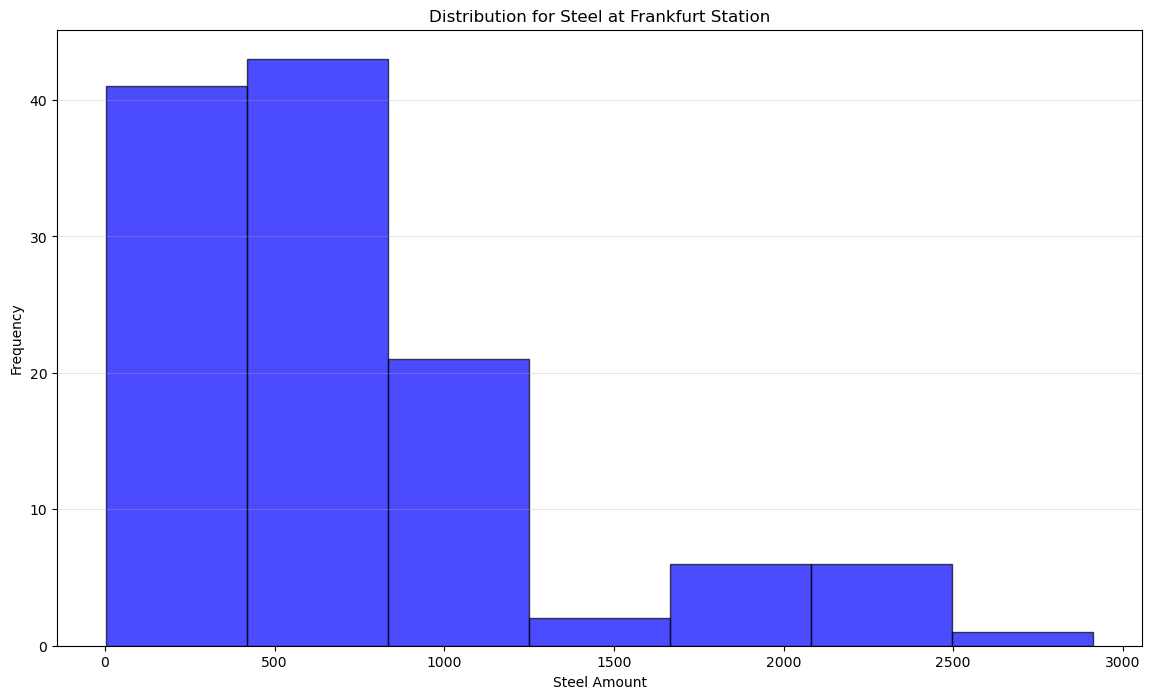

In [70]:
def analyze_cargo(data, station, cargo):
    if data is None:
        return
    
    # Filter data for the specified station 
    station_data = data[data['Station'] == station]
    
    if station_data.empty:
        print(f"No data found for station '{station}'")
        return
    
    # Check if the cargo type exists as a column
    if cargo not in data.columns:
        print(f"Cargo type '{cargo}' not found in the dataset")
        return
    
    # Get the cargo amounts for the specified station and cargo type
    cargo_amounts = station_data[cargo]
    
    if cargo_amounts.empty or cargo_amounts.isna().all():
        print(f"No data found for '{cargo}' at station '{station}'")
        return
    
    plt.figure(figsize=(14, 8))
    plt.hist(cargo_amounts, bins=7, alpha=0.7, color='blue', edgecolor='black')
    
    plt.title(f'Distribution for {cargo} at {station} Station')
    plt.xlabel(f'{cargo} Amount')
    plt.ylabel('Frequency')
    plt.grid(axis='y', alpha=0.3)
    

    plt.show()


df = read_data(csv_data_file_path)
# Load the data
if df is not None:
    stations = df['Station'].unique()
    cargoes = ['Iron', 'Coal', 'Steel', 'Vegetables', 'Cereals', 'Wool', 'Coffee', 'Cattle', 'Mail']
    
    stations_str = ', '.join(stations)
    cargoes_str = ', '.join(cargoes)
    
    display(Markdown('<span style="font-size: large; font-weight: bold">Available Stations:</span>'))
    display(Markdown(stations_str))
    display(Markdown('<span style="font-size: large; font-weight: bold">Available Cargo Types:</span>'))
    display(Markdown(cargoes_str))

    station = input("Enter the station name: ")
    cargo = input("Enter the cargo type: ")
    
    # Perform the analysis
    analyze_cargo(df, station, cargo)

**US18** -  As a Player, I want to perform the analysis of train distribution, passengers, and mail across different stations.


--- Estatísticas por estação ---
           Média de Comboios  Média de Passageiros  Média de Correio  \
Estação                                                                
Berlin           1270.391667         453342.850000        117.728000   
Frankfurt         752.016667         448531.425000         24.083667   
Hamburg          2035.200000         619691.583333         56.731750   
Hannover          768.700000         344955.508333         16.517000   
Stuttgart        1814.533333         569075.241667         19.585917   

           Total de Comboios  Total de Passageiros  Total de Correio  
Estação                                                               
Berlin              152447.0            54401142.0          14127.36  
Frankfurt            90242.0            53823771.0           2890.04  
Hamburg             244224.0            74362990.0           6807.81  
Hannover             92244.0            41394661.0           1982.04  
Stuttgart           217744.0       

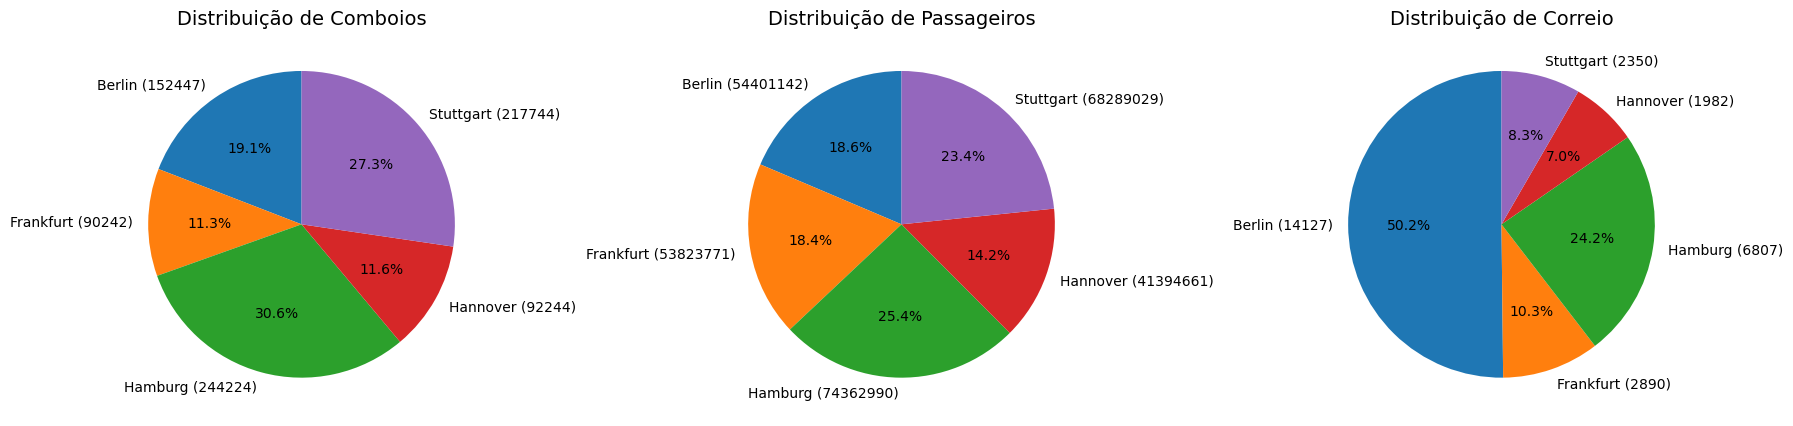

In [71]:
# Make sure to import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the function and execute it in the same cell to avoid NameError
def analyze_station_distribution():
    # Carregar os dados
    stations_data = read_data(csv_data_file_path)
    # Limpar nomes das colunas
    stations_data.columns = [col.strip() for col in stations_data.columns]
    
    # Converter colunas numéricas
    try:
        for col in ['Arrivals', 'Passengers', 'Mail']:
            stations_data[col] = stations_data[col].astype(str).str.replace(',', '.').astype(float)
    except Exception as e:
        print(f"Error converting columns to numeric: {e}")
        return None
    
    # Agrupar por estação e somar valores
    grouped = stations_data.groupby('Station').sum(numeric_only=True)
    
    stations = grouped.index.tolist()
    trains = grouped['Arrivals'].to_numpy()
    passengers = grouped['Passengers'].to_numpy()
    mail = grouped['Mail'].to_numpy()
    
    # Cálculo de estatísticas
    stats_data = []
    for station in stations:
        station_data = stations_data[stations_data['Station'] == station]
        stats = {
            'Estação': station,
            'Média de Comboios': station_data['Arrivals'].mean(),
            'Média de Passageiros': station_data['Passengers'].mean(),
            'Média de Correio': station_data['Mail'].mean(),
            'Total de Comboios': station_data['Arrivals'].sum(),
            'Total de Passageiros': station_data['Passengers'].sum(),
            'Total de Correio': station_data['Mail'].sum()
        }
        stats_data.append(stats)
    
    stats_df = pd.DataFrame(stats_data).set_index('Estação')
    
    print("\n--- Estatísticas por estação ---")
    print(stats_df)
    
    # Criar labels para os gráficos
    station_labels_trains = [f"{name} ({int(val)})" for name, val in zip(stations, trains)]
    station_labels_passengers = [f"{name} ({int(val)})" for name, val in zip(stations, passengers)]
    station_labels_mail = [f"{name} ({int(val)})" for name, val in zip(stations, mail)]
    
    # Plotar gráficos de pizza
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))
    
    # Gráfico de comboios
    axs[0].pie(trains, labels=station_labels_trains, autopct='%1.1f%%', startangle=90)
    axs[0].set_title('Distribuição de Comboios', fontsize=14)
    
    # Gráfico de passageiros
    axs[1].pie(passengers, labels=station_labels_passengers, autopct='%1.1f%%', startangle=90)
    axs[1].set_title('Distribuição de Passageiros', fontsize=14)
    
    # Gráfico de correio
    axs[2].pie(mail, labels=station_labels_mail, autopct='%1.1f%%', startangle=90)
    axs[2].set_title('Distribuição de Correio', fontsize=14)
    
    plt.tight_layout()
    plt.show()
    
    return stations_data

# Now execute the function
station_data = analyze_station_distribution()

# Team Contributions

The development of this statistical analysis notebook was distributed among team members as follows:

| Team Member | Student Number | User Story | Contribution |
|------------|---------------|-----------|-------------|
| Miguel Pinto | 1221526 | US15 - Statistical analysis of station profit | 25% (100% of the US) |
| Eduardo Costa | 1210491 | US16 - Comparative analysis of passenger arrivals | 25% (100% of the US) |
| Carlos Almeida | 1221515 | US17 - Analysis of cargo at stations | 15% (made the code) |
| Bruno Silva | 1221514 | US17 - Analysis of cargo at stations | 10% (made the statistical analysis, .tex doc file) |
| João Barroso | 1221519 | US18 - Analysis of train distribution | 25% (100% of the US) |

Each team member was responsible for implementing their respective user story, representing approximately 25% of the total work. The team collaborated on integrating the different analysis components into a cohesive notebook.